In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv("/Users/jamie/Downloads/Adidas US Sales Datasets.csv")

Data Cleaning:
    <ul>Turning the data to the correct datatype</ul>
    <ol>1. Turn the Invoce Date cloumn to datetime datatype</ol>
    <ol>2.Dropping the symbol and turn the numerical data to int or float</ol>
   
    

In [3]:
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], format="%d/%m/%Y")
df["Price per Unit"] = df["Price per Unit"].str.replace("$","").astype(float)
df["Total Sales"] = df["Total Sales"].str.replace("$", "").str.replace(",", "").astype(float)
df["Operating Profit"] = df["Operating Profit"].str.replace("$", "").str.replace(",", "").astype(float)
df["Operating Margin"] = df["Operating Margin"].str.replace("%","").astype(float) / 100
df["Units Sold"] = df["Units Sold"].str.replace(",","").astype(int)

/var/folders/c_/vs778dgn3lgdd5pnlw2f4qz40000gn/T/ipykernel_66053/2128143986.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price per Unit"] = df["Price per Unit"].str.replace("$","").astype(float)
/var/folders/c_/vs778dgn3lgdd5pnlw2f4qz40000gn/T/ipykernel_66053/2128143986.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Total Sales"] = df["Total Sales"].str.replace("$", "").str.replace(",", "").astype(float)
/var/folders/c_/vs778dgn3lgdd5pnlw2f4qz40000gn/T/ipykernel_66053/2128143986.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as liter

Creating a pivot table to show the values of all the numerical columns

In [4]:
Total_sales_performance = df.pivot_table(values=['Units Sold', 'Total Sales', 'Operating Profit']
               , index="Invoice Date")

Total_sales_performance.sort_index()

,Operating Profit,Total Sales,Units Sold
Invoice Date,,,
2020-01-01,63688.67,140856.83,393.50
2020-01-02,37657.83,114901.67,385.00
2020-01-03,33713.17,105428.83,383.67
2020-01-04,38039.17,102513.33,347.50
2020-01-05,37065.33,117971.50,319.50
...,...,...,...
2021-12-27,56592.00,120470.60,262.80
2021-12-28,21271.80,60202.00,149.80
2021-12-29,17056.20,42221.80,111.40


Split the pivot table by years and cumulate the values for the year

In [5]:
Total_sales_performance_2020 = Total_sales_performance.loc[Total_sales_performance.index.year == 2020]

In [6]:
Total_sales_performance_2021 = Total_sales_performance.loc[Total_sales_performance.index.year == 2021]

In [7]:
Total_sales_performance_2020 = Total_sales_performance_2020.cumsum()

In [8]:
Total_sales_performance_2021 = Total_sales_performance_2021.cumsum()

Find the max cumulated value of the Total Sales in 2020 and 2021, and use it as the max value of the Y-axis.<br>
So that the graph of each year could share the same max value.

In [9]:
max_value = max(Total_sales_performance_2020["Total Sales"].max(), 
                Total_sales_performance_2020["Total Sales"].max())

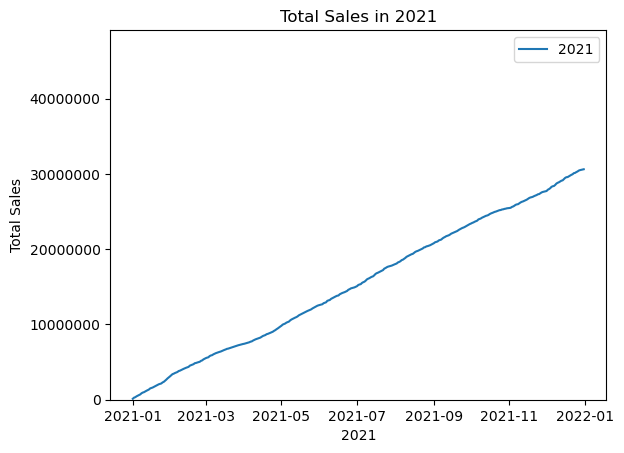

In [10]:
try:
    plt.plot(Total_sales_performance_2021.index, Total_sales_performance_2021['Total Sales'], label='2021')
    plt.ylim(0, max_value)
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.xlabel('2021')
    plt.ylabel('Total Sales')
    plt.title('Total Sales in 2021')
    plt.legend()
    plt.show()
    
except KeyError:
    pass

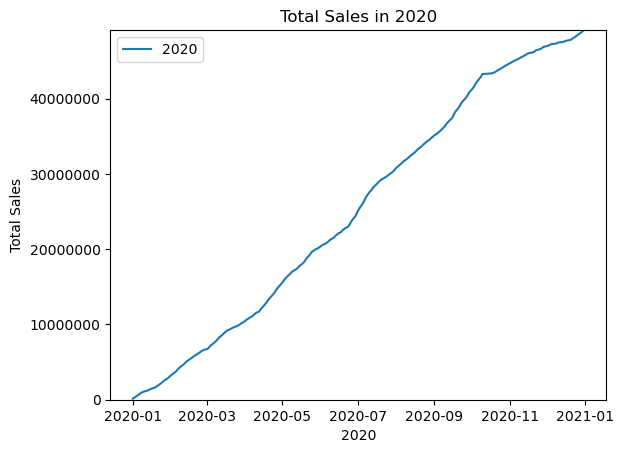

In [11]:
try:
    plt.plot(Total_sales_performance_2020.index, Total_sales_performance_2020['Total Sales'], label='2020')
    plt.ylim(0, max_value)
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

    plt.xlabel('2020')
    plt.ylabel('Total Sales')
    plt.title('Total Sales in 2020')

    plt.legend()
    plt.show()
    
except KeyError:
    pass

In [21]:
Total_Sales_performance_compare = pd.concat([Total_sales_performance_2021,Total_sales_performance_2020], axis=1, ignore_index=True)
Total_Sales_performance_compare.unstack()
Total_Sales_performance_compare.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Invoice Date', length=724, freq=None)

In [19]:
Total_Sales_performance_compare = Total_Sales_performance_compare.dropna()
Total_Sales_performance_compare.shape

(0, 6)